# Evolutionary history of a broad-binding antibody clone (L3)

Here, we visualize the reconstructed evolutionary history of the L3 antibody clone. Multiple sequence alignment was performed using MUSCLE and phylogenetic reconstruction was performed using FastTree. The results are loaded and plotted here.

In [3]:
import sys
import os
import time
import random
import copy
import math

import numpy as np
import scipy
import pandas as pd

from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
from Bio import SeqIO, Align, AlignIO, Phylo
import ete3

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': "Helvetica",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)

sns.set_style("ticks")

savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": True}
mpl.rc('savefig', dpi=300)
output_dir = "outs"
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data_dir = "../data/"

# Load alignment and tree

In [4]:
def load_tree(f):
    t = Phylo.read(f, 'newick')
    t.root_with_outgroup("germline")
    t.get_nonterminals()[0].branch_length = 0.0
    t.ladderize(reverse=True)
    return t

def load_aln(infile):

    aln = Align.MultipleSeqAlignment([])
    aln_dict = {}

    with open(infile, 'r') as f:
        for seq_record in SeqIO.parse(f, 'fasta'):
            aln.append(seq_record)
            aln_dict[seq_record.id] = str(seq_record.seq)

    return aln, aln_dict

In [5]:
infile_aln = data_dir + "L3.fasta"
infile_tree = data_dir + "L3.nwk"

aln, _ = load_aln(infile_aln)
T = load_tree(infile_tree)

print len(aln), "sequences"

125 sequences


# Visualize phylogeny

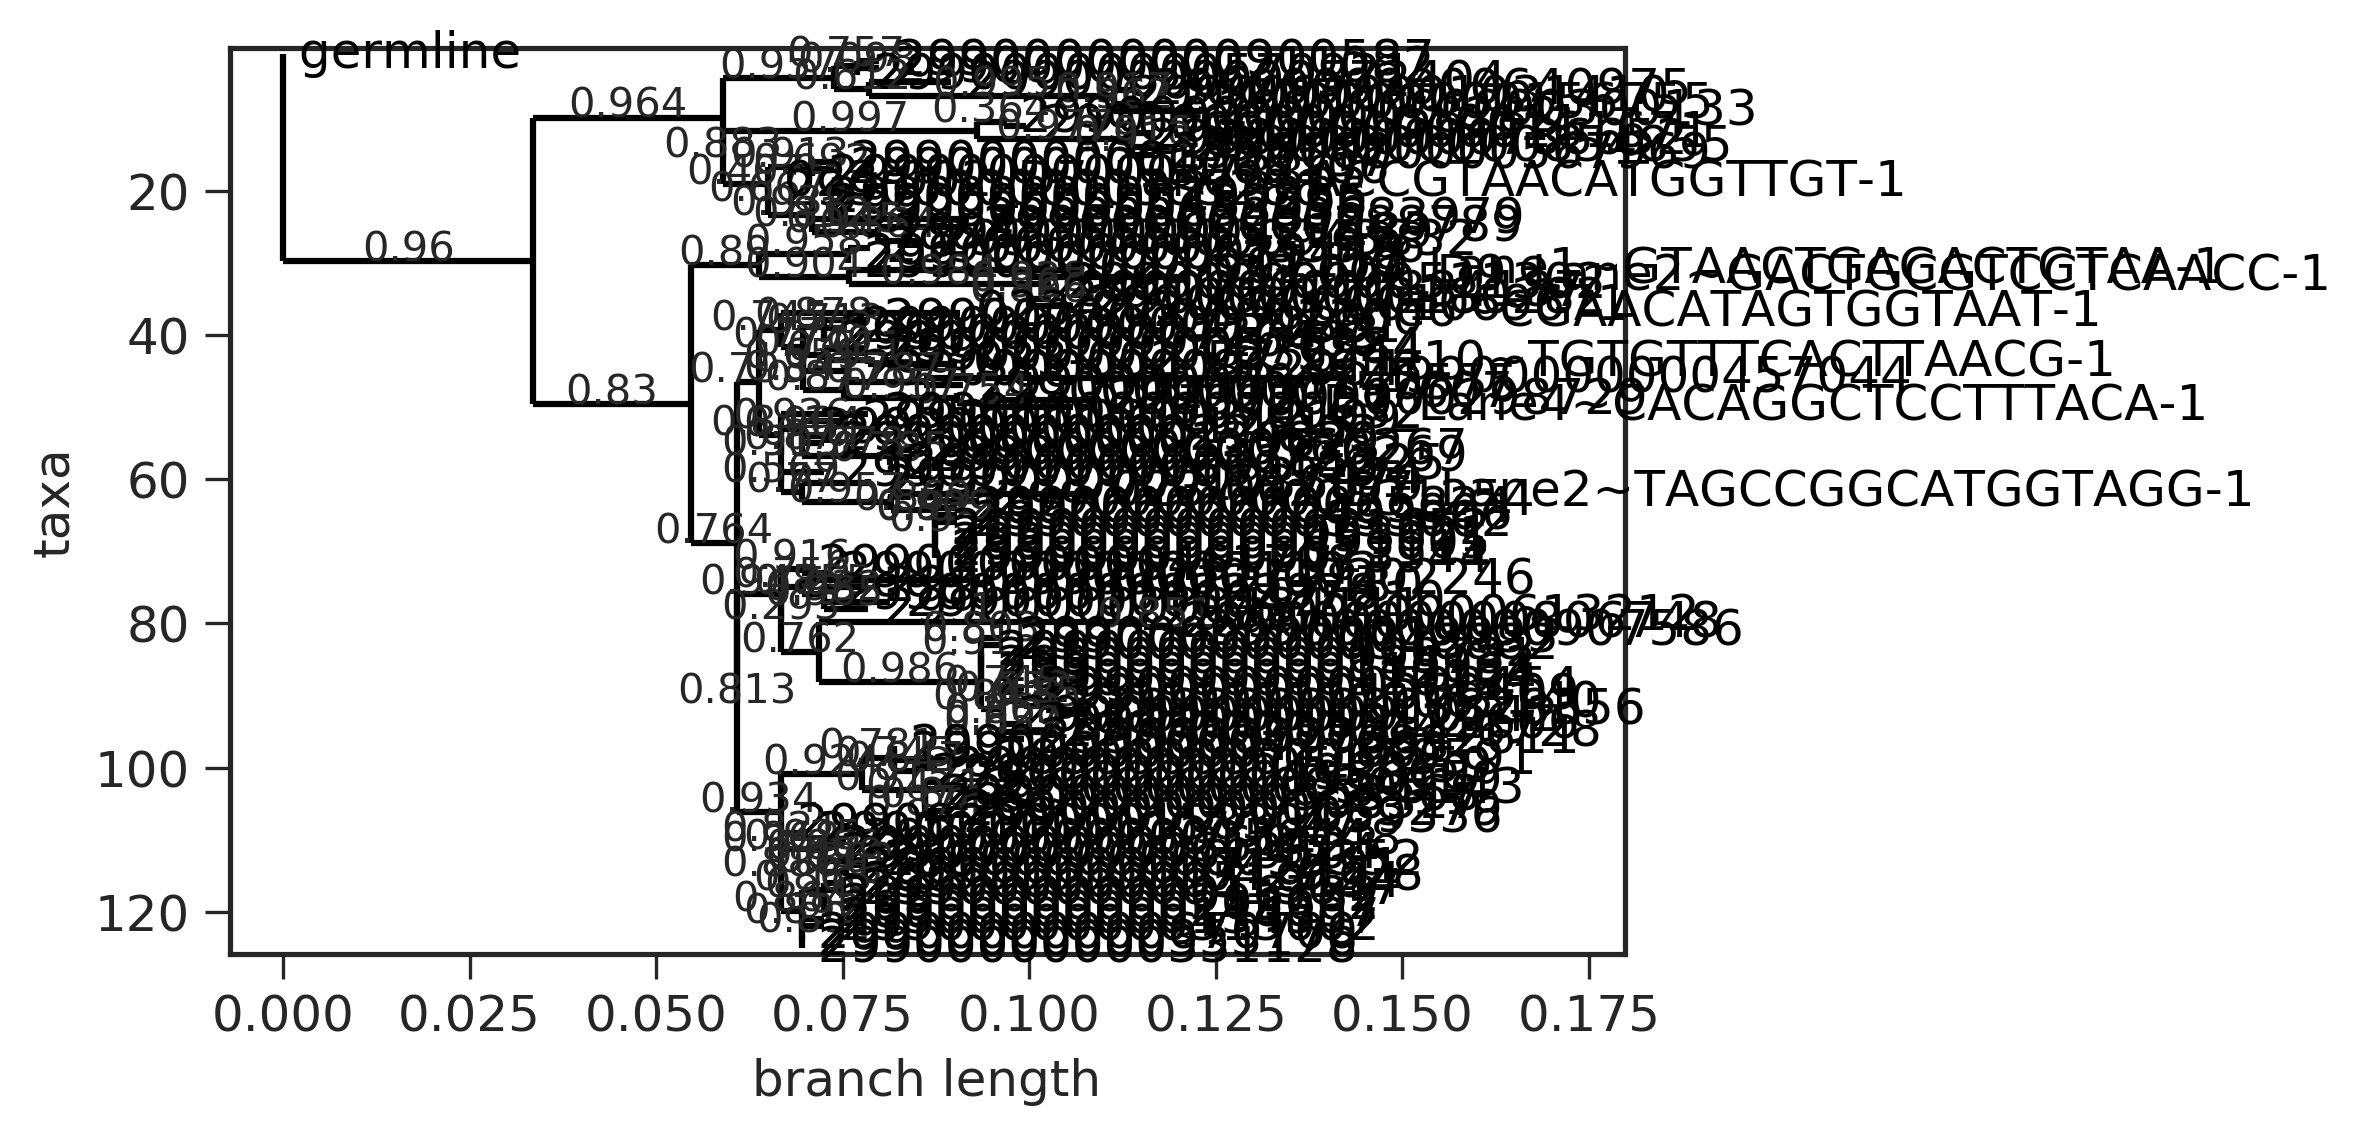

In [6]:
# Quick look
T.ladderize()
Phylo.draw(T)

In [7]:
# Set plot parameters
params = {'lines.linewidth': 2}
mpl.rcParams.update(params)

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

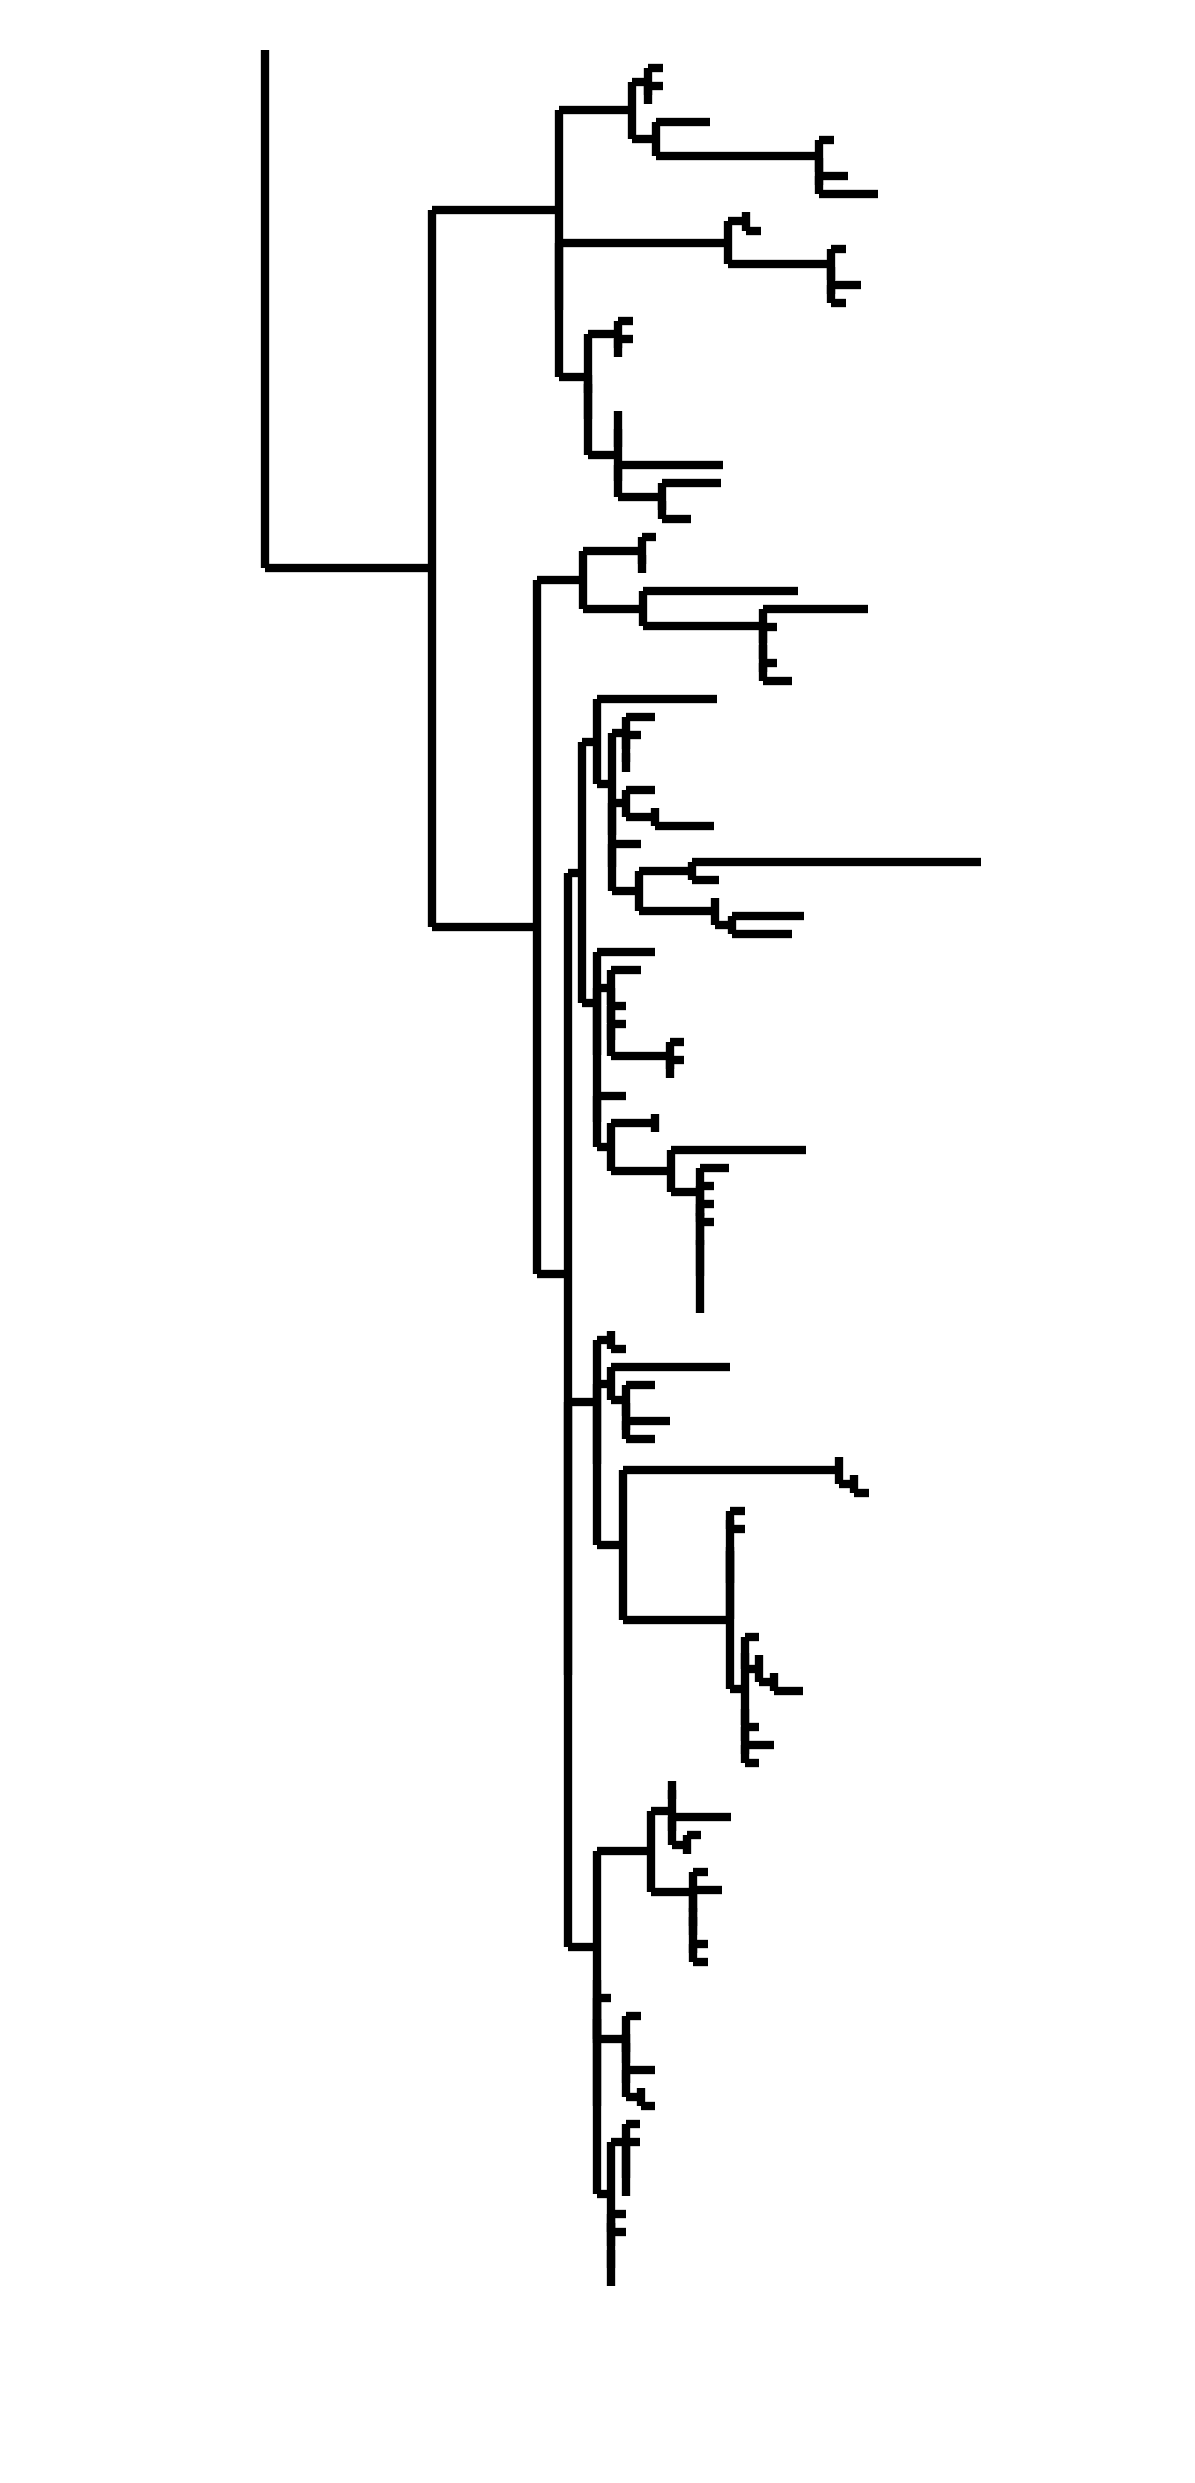

In [8]:
# Without labels

fig, ax = plt.subplots(1, 1, figsize=(4,10))

ax.axis('off')

T.ladderize()
Phylo.draw(T, axes=ax, label_func=lambda x: None, show_confidence=False)

save_figure(fig, "Tree_L3_blank")

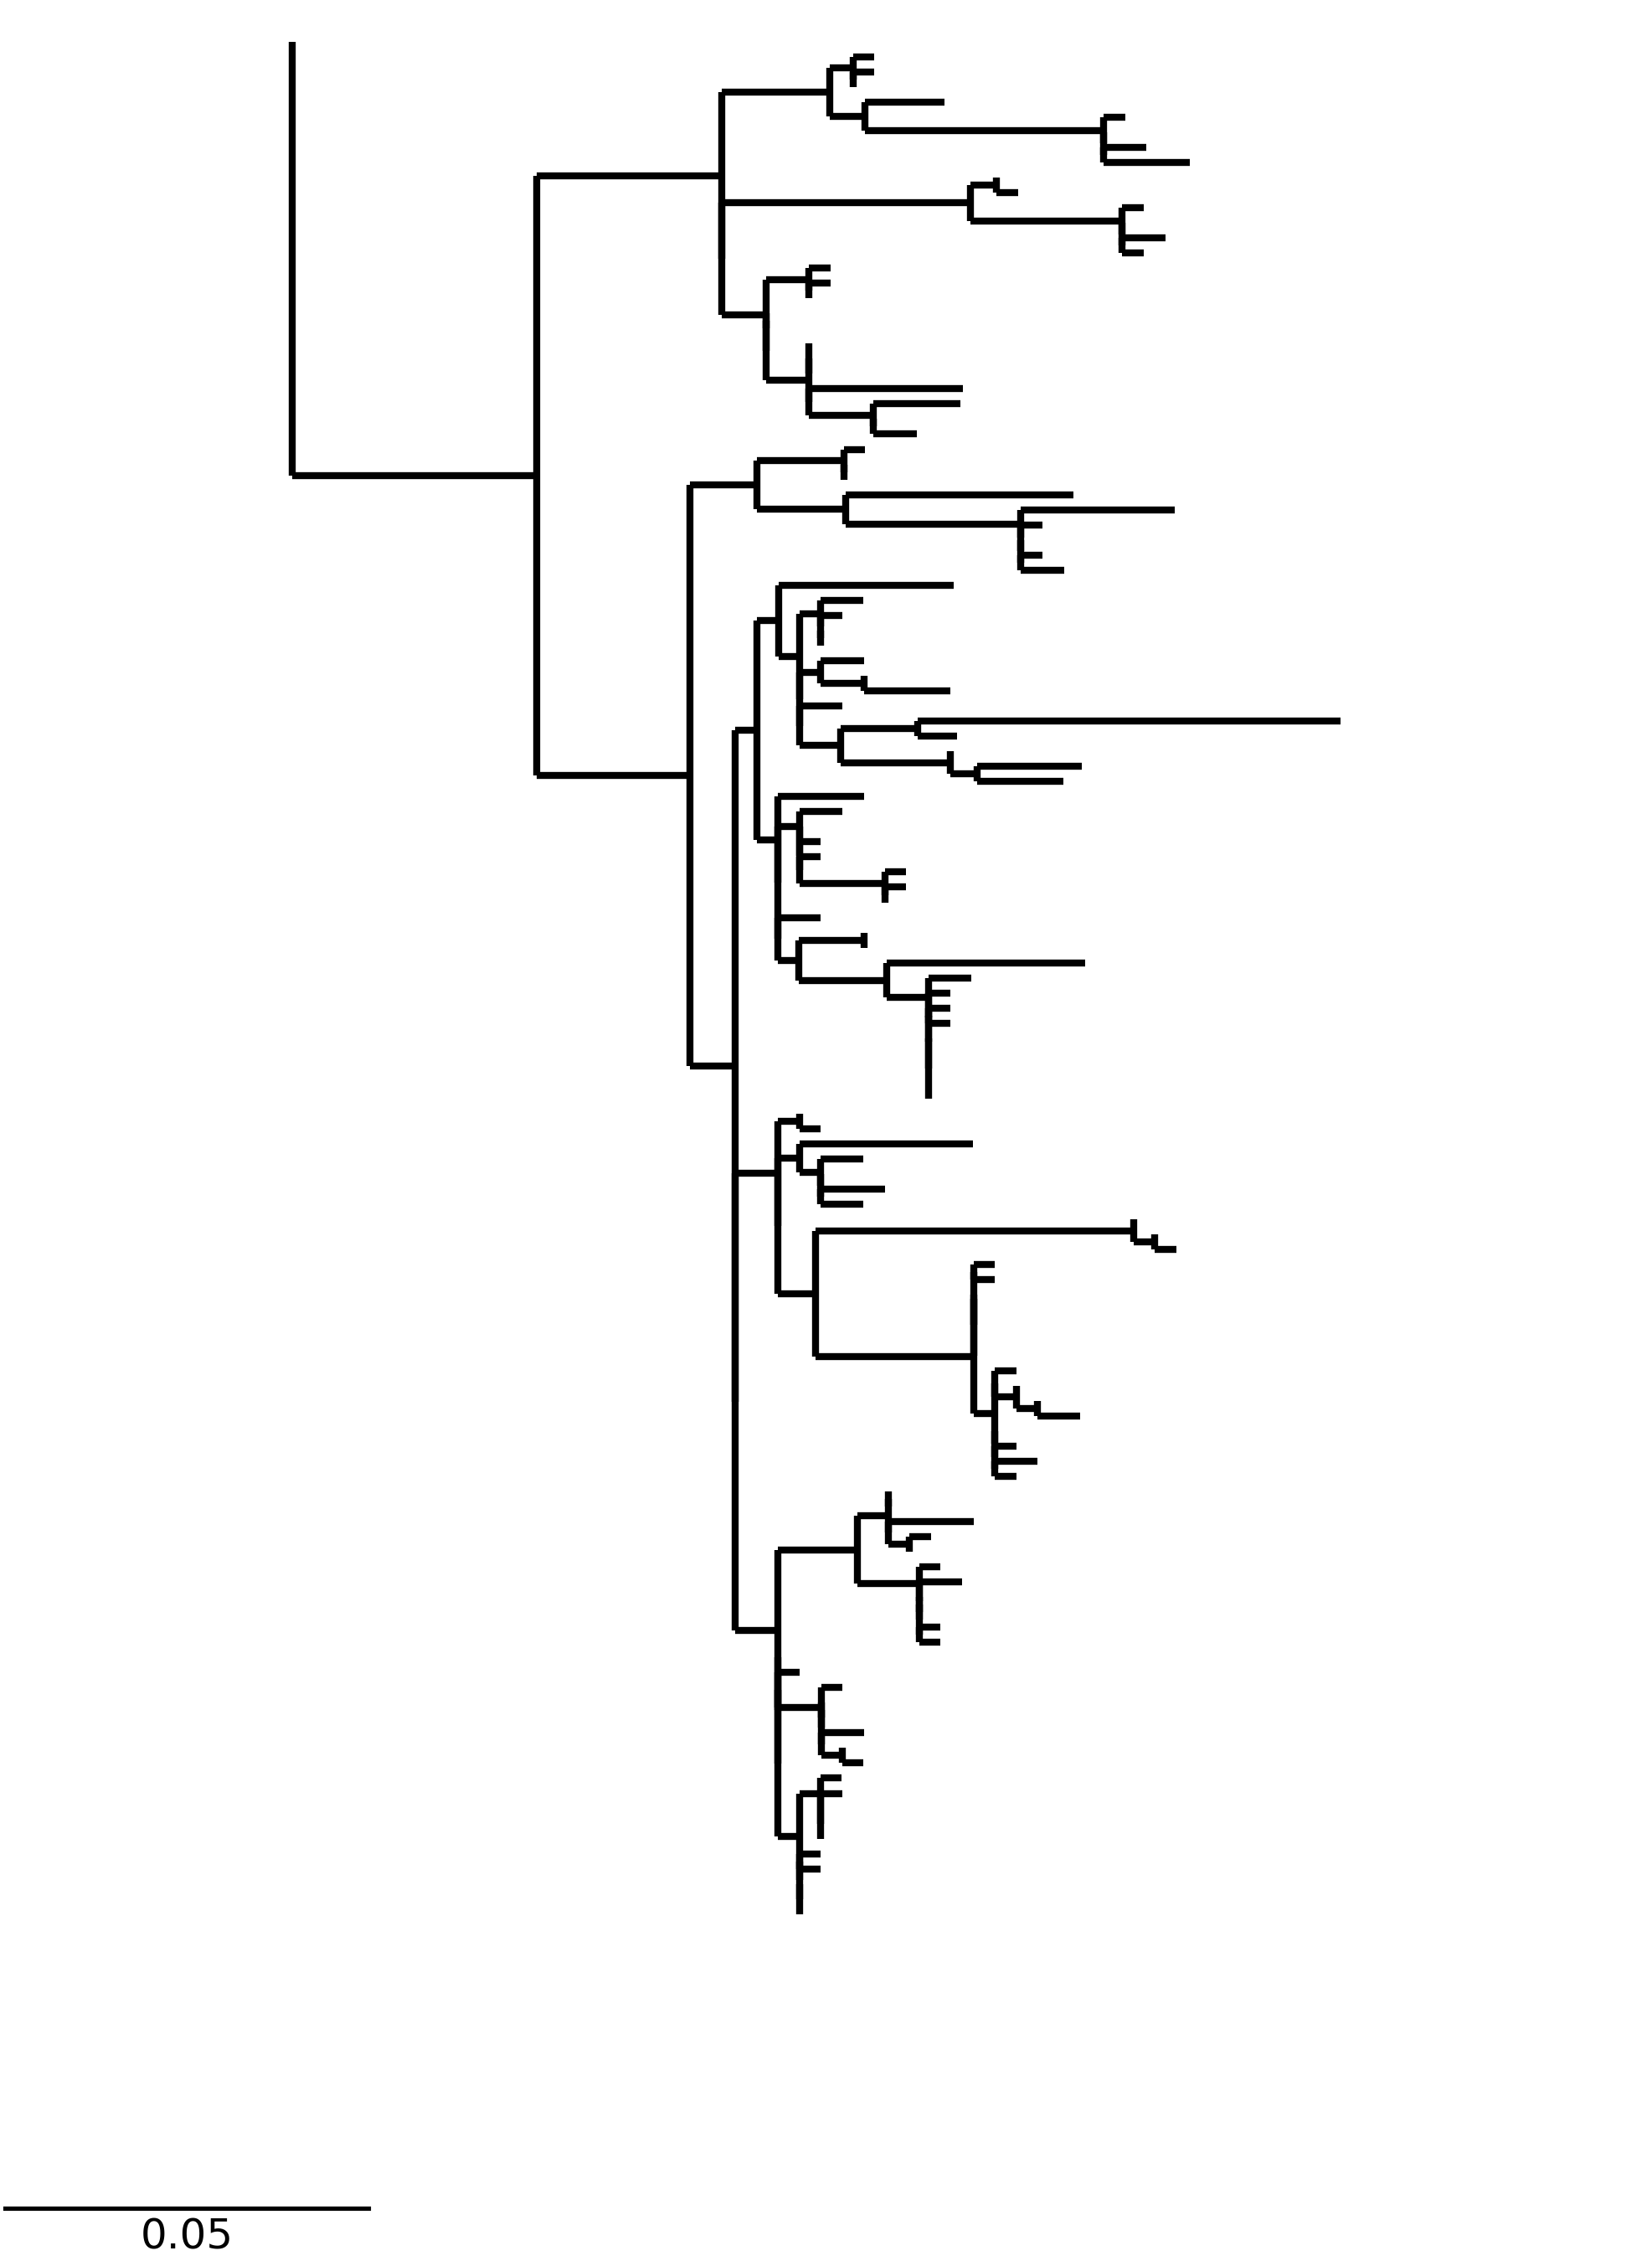

In [9]:
# Without labels

fig, ax = plt.subplots(1, 1, figsize=(7,10))

ax.axis('off')

scalebar = AnchoredSizeBar(ax.transData,
                           0.05, '0.05', 'lower left', 
                           bbox_to_anchor=(1.1, 0.2),
                           pad=0,
                           color='black',
                           frameon=False,
                           size_vertical=0.1)

ax.add_artist(scalebar)

T.ladderize()
Phylo.draw(T, axes=ax, label_func=lambda x: None, show_confidence=False)

save_figure(fig, "Tree_L3_scalebar")

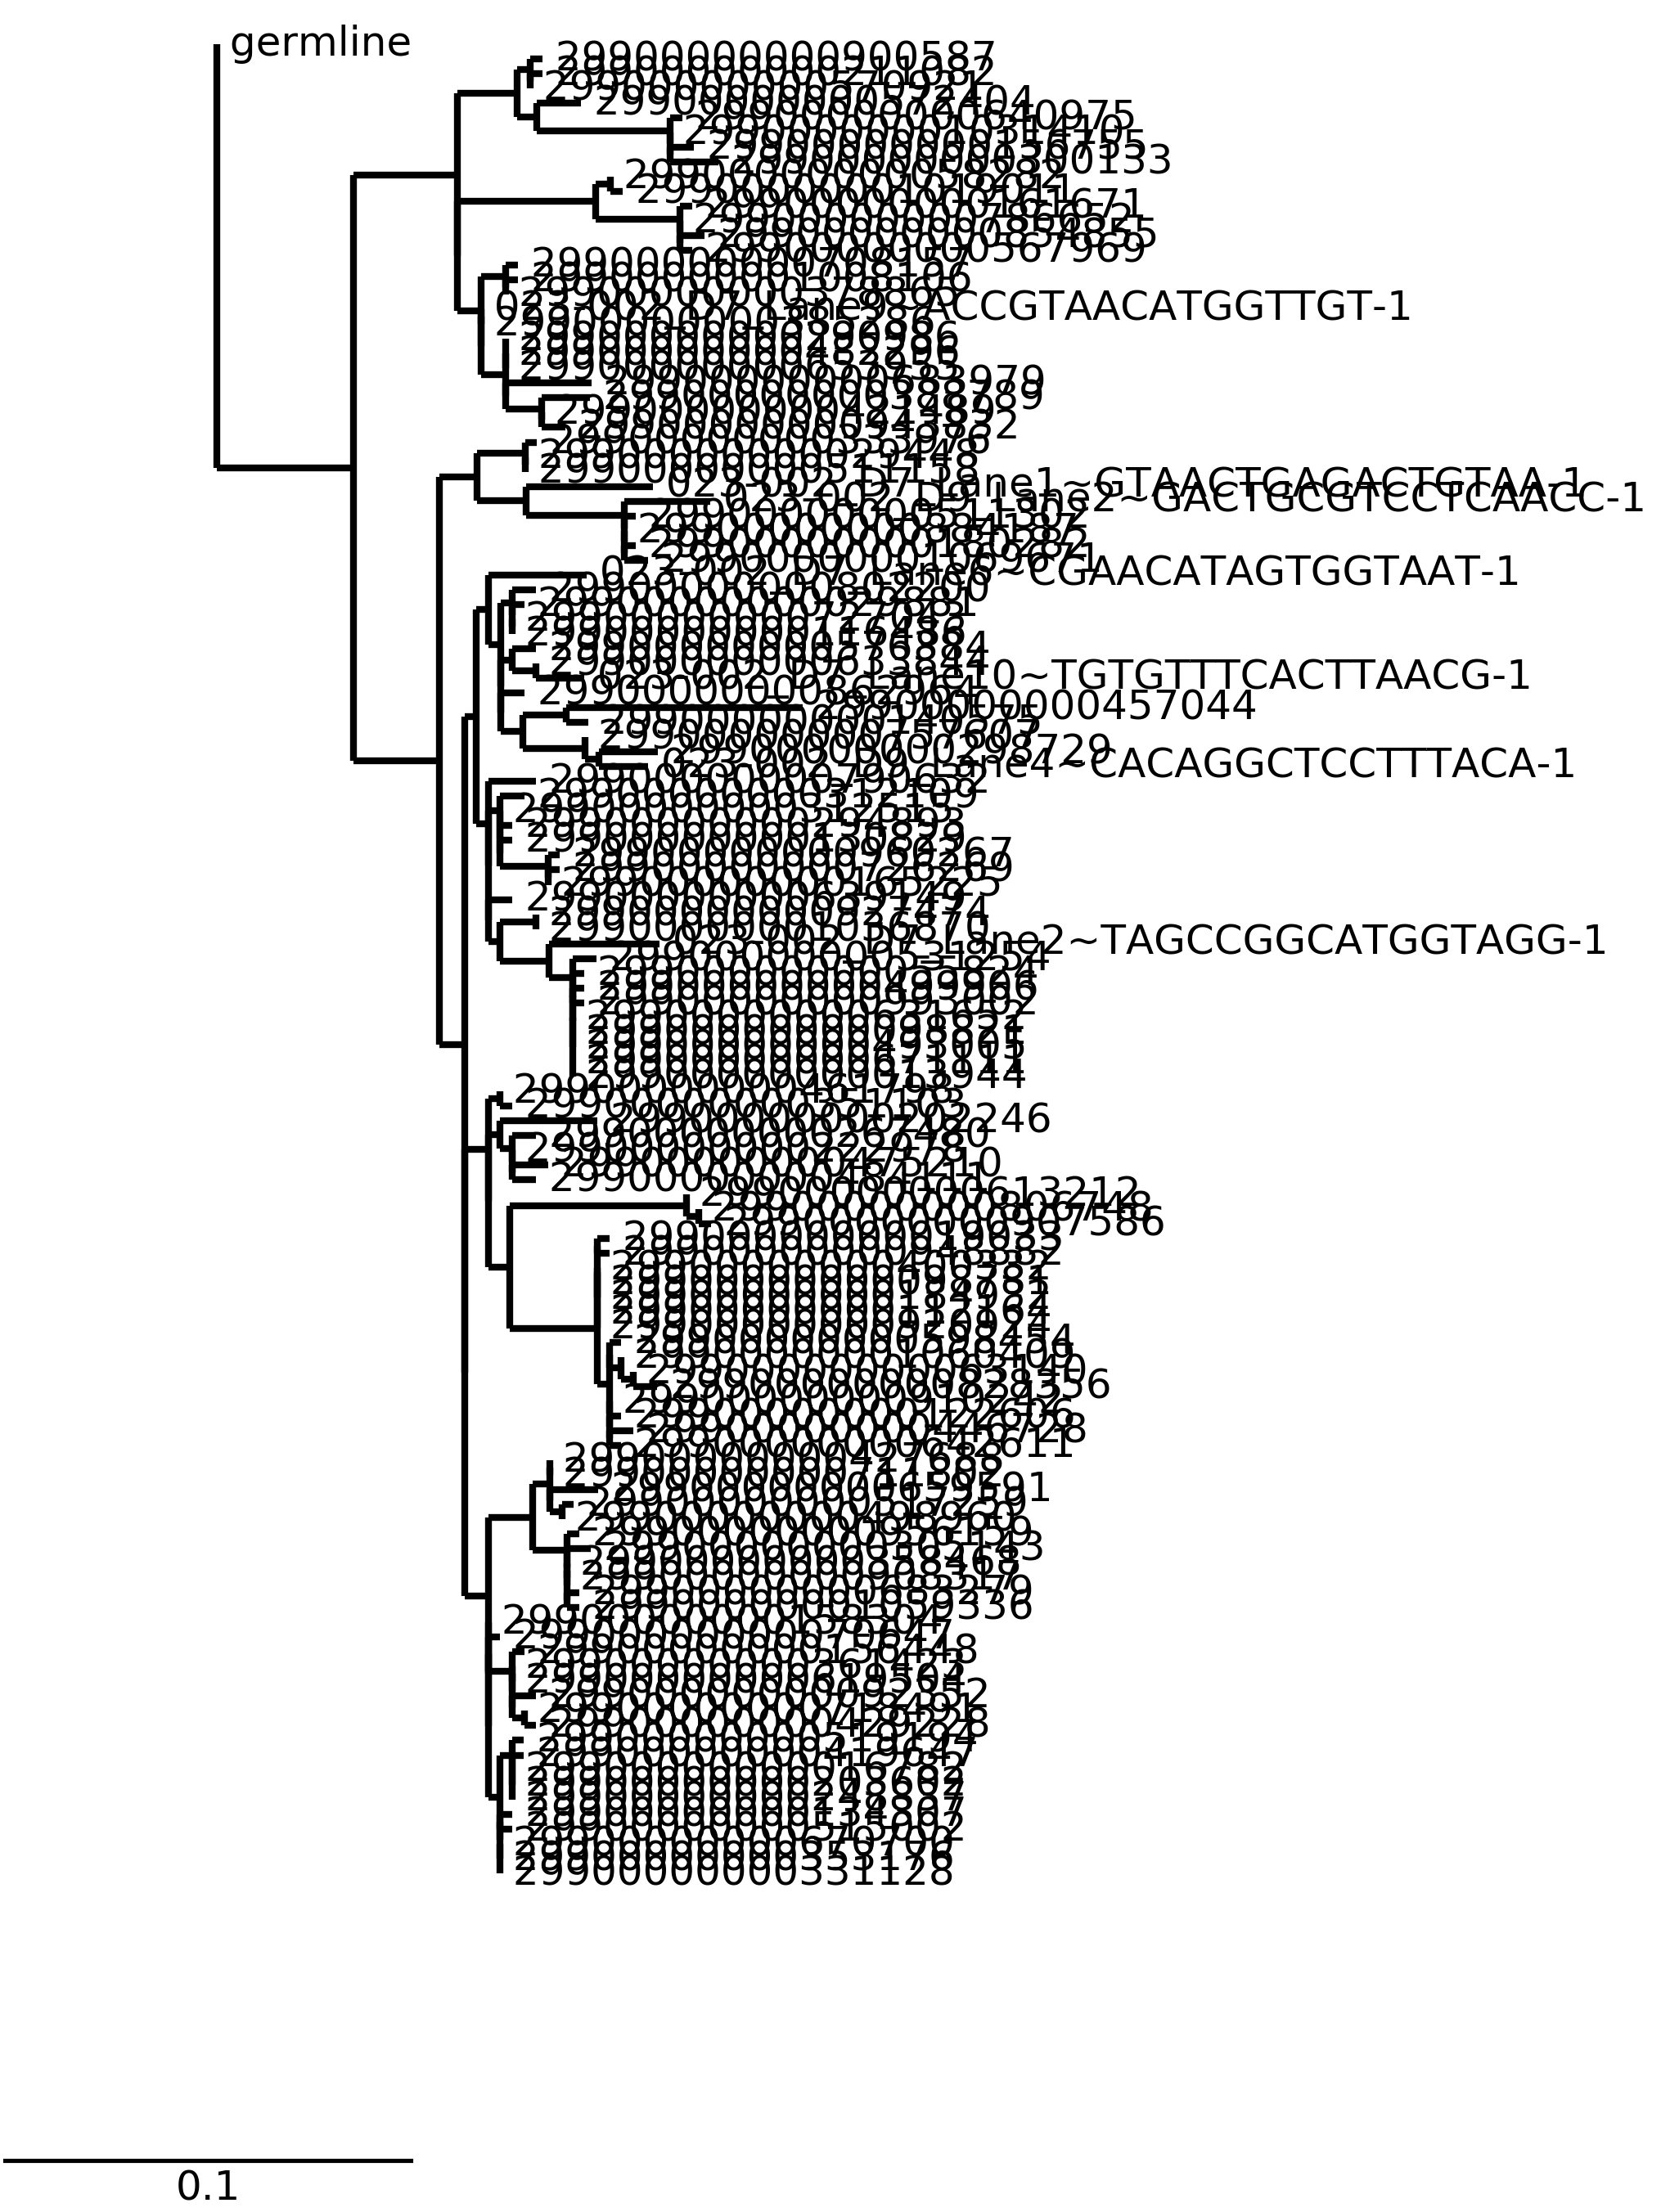

In [10]:
# Label names

def label_names(node):
    return node.name

fig, ax = plt.subplots(1, 1, figsize=(4,10))

ax.axis('off')

scalebar = AnchoredSizeBar(ax.transData,
                           0.1, '0.1', 'lower left', 
                           bbox_to_anchor=(1.1, 0.2),
                           pad=0,
                           color='black',
                           frameon=False,
                           size_vertical=0.1)

ax.add_artist(scalebar)

T.ladderize()
Phylo.draw(T, axes=ax, label_func=label_names, show_confidence=False)

save_figure(fig, "Tree_L3_names")

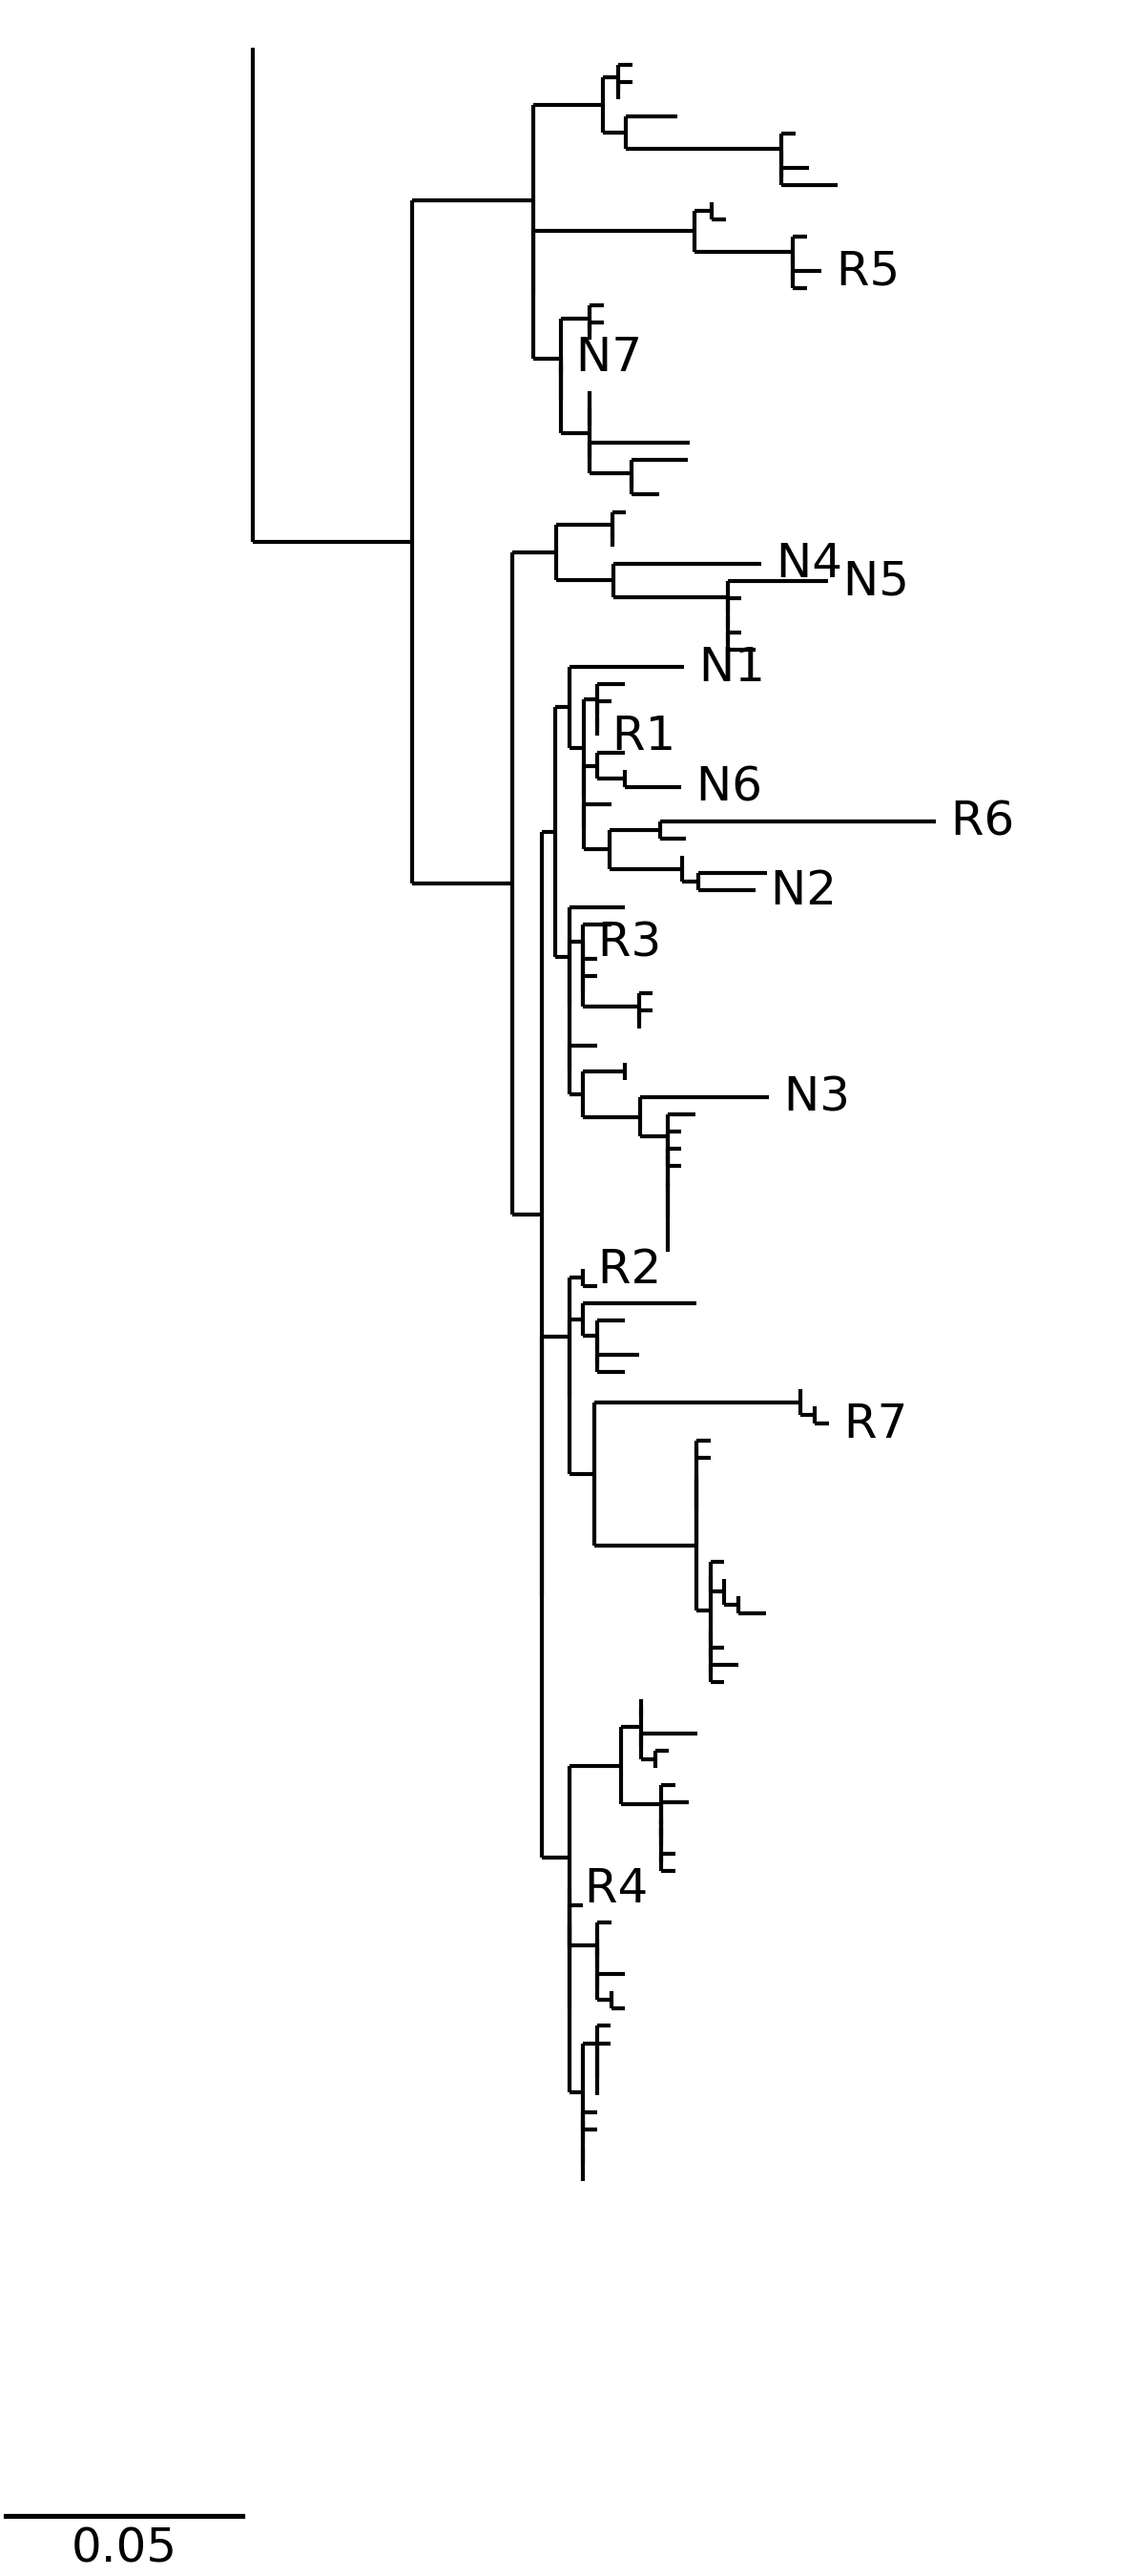

In [11]:
# Label names

def label_names_selected(node):
    names_substrs = []
        
    name_to_clean = {"023-002_D7_Lane6~CGAACATAGTGGTAAT-1": "N1",
                     "023-002_D9_Lane4~CACAGGCTCCTTTACA-1": "N2",
                     "023-002_D7_Lane2~TAGCCGGCATGGTAGG-1": "N3",
                     "023-002_D7_Lane1~GTAACTGAGACTGTAA-1": "N4",
                     "023-002_D9_Lane2~GACTGCGTCCTCAACC-1": "N5",
                     "023-002_D7_Lane10~TGTGTTTCACTTAACG-1": "N6",
                     "023-002_D7_Lane9~ACCGTAACATGGTTGT-1": "N7",
                     "2_": "A1",
                     "3_": "A2",
                     "4_": "A3",
                     "8_": "A4",
                     "29900000000116486": "R1",
                     "29900000000461798": "R2",
                     "29900000000312515": "R3",
                     "29900000000158304": "R4",
                     "29900000000854855": "R5",
                     "29900000000457044": "R6",
                     "29900000000907586": "R7"}
    
    names_chosen = name_to_clean.keys()
    
    if node.name is None:
        return None
    
    for substr in names_substrs:
        if substr in node.name:
            return node.name

    if node.name in names_chosen:
        return name_to_clean[node.name]
    else:
        return None

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

params = {'lines.linewidth': 1}
mpl.rcParams.update(params)

fig, ax = plt.subplots(1, 1, figsize=(4,10))

ax.axis('off')

scalebar = AnchoredSizeBar(ax.transData,
                           0.05, '0.05', 'lower left', 
                           bbox_to_anchor=(1.1, 0.2),
                           pad=0,
                           color='black',
                           frameon=False,
                           size_vertical=0.1)

ax.add_artist(scalebar)

T.ladderize()
Phylo.draw(T, axes=ax, label_func=label_names_selected, show_confidence=False)

save_figure(fig, "Tree_L3_names_selected")

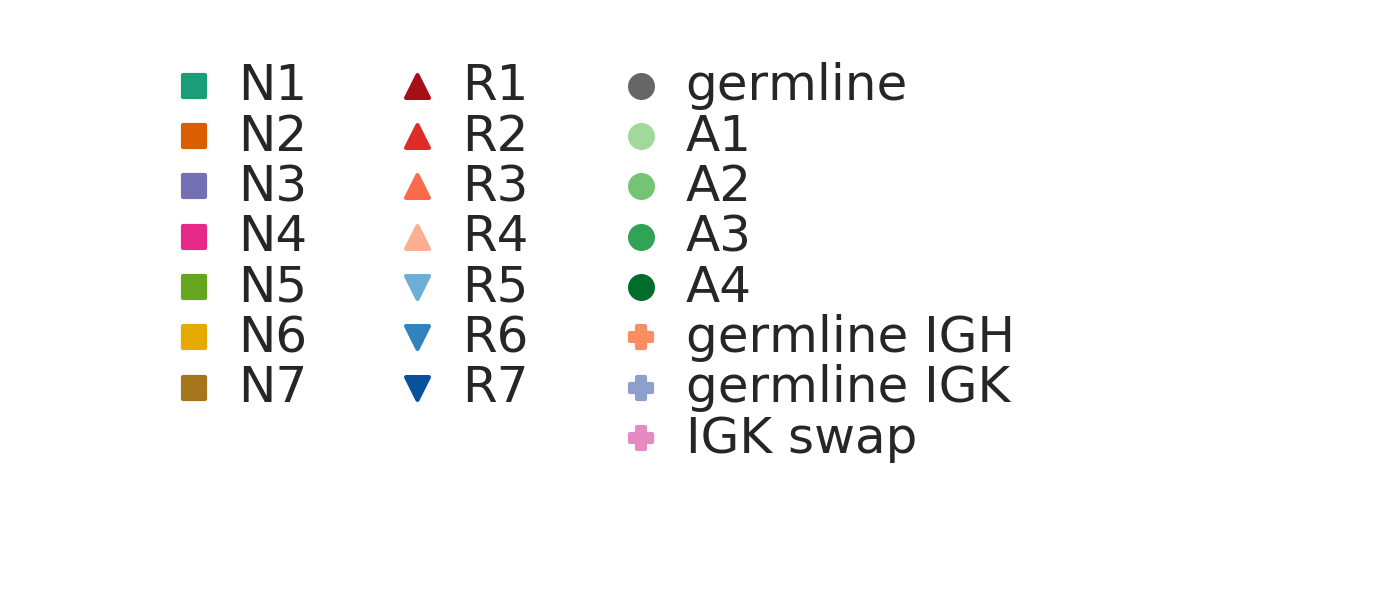

In [12]:
# Plot symbols for assembling figure

# Markers

name_to_marker = {"N1": "s",
              "N2": "s",
              "N3": "s",
              "N4": "s",
              "N5": "s",
              "N6": "s",
              "N7": "s",
              "R1": "^",
              "R2": "^",
              "R3": "^",
              "R4": "^",
              "R5": "v",
              "R6": "v",
              "R7": "v",
              "germline": "o",
              "A1": "o",
              "A2": "o",
              "A3": "o",
              "A4": "o",
              "germline IGH": "P",
              "germline IGK": "P",
              "IGK swap": "P"}

# Colors

name_to_color = dict(zip(["N1", "N2", "N3", "N4", "N5", "N6", "N7"], ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']) +
                    zip(["R1", "R2", "R3", "R4"], ['#fcae91','#fb6a4a','#de2d26','#a50f15'][::-1]) +
                    zip(["R5", "R6", "R7"], ['#6baed6','#3182bd','#08519c']) +
                    zip(["A1", "A2", "A3", "A4"], ['#a1d99b','#74c476','#31a354','#006d2c']) +
                    zip(["germline IGH", "germline IGK", "IGK swap"], ['#fc8d62','#8da0cb','#e78ac3']) +
                    zip(["germline"], ["#666666"]))

# Positions of points

x1 = 0
x2 = 0.5
x3 = 1

name_to_xy = {"N1": (0, 7),
              "N2": (0, 6),
              "N3": (0, 5),
              "N4": (0, 4),
              "N5": (0, 3),
              "N6": (0, 2),
              "N7": (0, 1),
              "R1": (x2, 7),
              "R2": (x2, 6),
              "R3": (x2, 5),
              "R4": (x2, 4),
              "R5": (x2, 3),
              "R6": (x2, 2),
              "R7": (x2, 1),
              "germline": (x3, 7),
              "A1": (x3, 6),
              "A2": (x3, 5),
              "A3": (x3, 4),
              "A4": (x3, 3),
              "germline IGH": (x3, 2),
              "germline IGK": (x3, 1),
              "IGK swap": (x3, 0)}

fig, ax = plt.subplots(1, 1, figsize=(5,2))

for name in name_to_xy.keys():
        
    x, y = name_to_xy[name]
    color = name_to_color[name]
    marker = name_to_marker[name]
    
    ax.scatter(x, y, c=color, marker=marker, s=30)
    
    ax.annotate(name, (x+0.1, y), ha="left", va="center")
    
ax.set_xlim(-0.1, 2.5)
ax.set_ylim(-1, 8)
ax.axis('off')

save_figure(fig, "Tree_L3_legend")

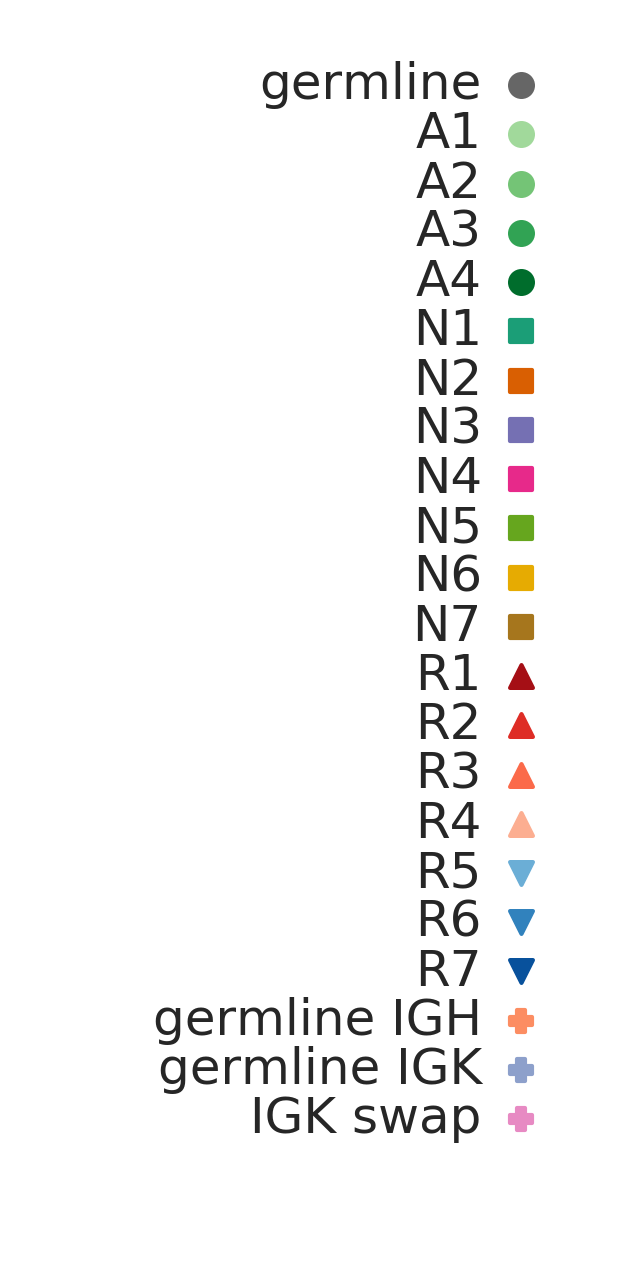

In [13]:
# Plot alignment labels

# Markers

name_to_marker = {"N1": "s",
              "N2": "s",
              "N3": "s",
              "N4": "s",
              "N5": "s",
              "N6": "s",
              "N7": "s",
              "R1": "^",
              "R2": "^",
              "R3": "^",
              "R4": "^",
              "R5": "v",
              "R6": "v",
              "R7": "v",
              "germline": "o",
              "A1": "o",
              "A2": "o",
              "A3": "o",
              "A4": "o",
              "germline IGH": "P",
              "germline IGK": "P",
              "IGK swap": "P"}

# Colors

name_to_color = dict(zip(["N1", "N2", "N3", "N4", "N5", "N6", "N7"], ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']) +
                    zip(["R1", "R2", "R3", "R4"], ['#fcae91','#fb6a4a','#de2d26','#a50f15'][::-1]) +
                    zip(["R5", "R6", "R7"], ['#6baed6','#3182bd','#08519c']) +
                    zip(["A1", "A2", "A3", "A4"], ['#a1d99b','#74c476','#31a354','#006d2c']) +
                    zip(["germline IGH", "germline IGK", "IGK swap"], ['#fc8d62','#8da0cb','#e78ac3']) +
                    zip(["germline"], ["#666666"]))

# Positions of points

name_order = ["germline", "A1", "A2", "A3", "A4", "N1", "N2", "N3", "N4", "N5", "N6", "N7",
              "R1", "R2", "R3", "R4", "R5", "R6", "R7", "germline IGH", "germline IGK", "IGK swap"]

fig, ax = plt.subplots(1, 1, figsize=(2,5))

x = 0

for i, name in enumerate(name_order[::-1]):
        
    color = name_to_color[name]
    marker = name_to_marker[name]
    
    y = i
    
    ax.scatter(x, y, c=color, marker=marker, s=30)
    ax.annotate(name, (x-0.5, y), ha="right", va="center")
    
ax.set_xlim(-5, 1)
ax.set_ylim(-1, len(name_order))
ax.axis('off')

save_figure(fig, "alignment_legend")